In [2]:
import pandas as pd
import xarray as xr
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from ar6_ch6_rcmipfigs.constants import INPUT_DATA_DIR

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs
/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_in


In [3]:
import seaborn as sns

### General about computing $\Delta T$:

# Code + figures

### Path input data

In [4]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR, BASE_DIR

#PATH_DATASET = OUTPUT_DATA_DIR / 'ERF_data.nc'
PATH_DATASET = OUTPUT_DATA_DIR/'historic_delta_GSAT/dT_data_hist_recommendation.nc'






fn_erf_decomposition = OUTPUT_DATA_DIR / 'historic_delta_GSAT/hist_ERF_est_decomp.csv'
fn_ERF_2019= OUTPUT_DATA_DIR/'historic_delta_GSAT/2019_ERF_est.csv'
#fn_output_decomposition = OUTPUT_DATA_DIR / 'historic_delta_GSAT/hist_ERF_est_decomp.csv'

## Path output data

In [5]:
#PATH_DT_TAB_OUTPUT = RESULTS_DIR / 'tables' / 'table_sens_dT_cs_recommandetion.csv'
PATH_DF_OUTPUT = OUTPUT_DATA_DIR / 'historic_delta_GSAT/dT_data_hist_recommendation.csv'

print(PATH_DF_OUTPUT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/historic_delta_GSAT/dT_data_hist_recommendation.csv


## various definitions

Year to integrate from and to:

In [6]:
first_y = 1750
last_y = 2019

**Set reference year for temperature change:**

In [7]:
ref_year = 1750

### Define variables to look at:

In [8]:
# variables to plot:
variables_erf_comp = [
    'CO2', 'N2O', 'CH4', 'HC', 'NOx', 'SO2', 'BC', 'OC', 'NH3','VOC'
]
# total ERFs for anthropogenic and total:
variables_erf_tot = []
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:
scenarios_fl = []

### Open ERF dataset:

In [9]:
ds = xr.open_dataset(PATH_DATASET)
ds['Delta T']

<xarray.DataArray 'Delta T' (percentile: 1, variable: 10, year: 270)>
array([[[0.000000e+00, 1.446359e-04, ..., 1.062350e+00, 1.083193e+00],
        [0.000000e+00, 9.791198e-06, ..., 1.242319e-01, 1.262741e-01],
        ...,
        [0.000000e+00, 2.272272e-05, ..., 2.796366e-01, 2.765587e-01],
        [0.000000e+00, 0.000000e+00, ..., 1.094546e-01, 1.103132e-01]]])
Coordinates:
  * year        (year) int64 1750 1751 1752 1753 1754 ... 2016 2017 2018 2019
  * variable    (variable) object 'CO2' 'N2O' 'CH4' 'NOx' ... 'NH3' 'VOC' 'HC'
  * percentile  (percentile) object 'recommendation'

In [10]:
ds['variable']

<xarray.DataArray 'variable' (variable: 10)>
array(['CO2', 'N2O', 'CH4', 'NOx', 'SO2', 'BC', 'OC', 'NH3', 'VOC', 'HC'],
      dtype=object)
Coordinates:
  * variable  (variable) object 'CO2' 'N2O' 'CH4' 'NOx' ... 'NH3' 'VOC' 'HC'

In [11]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic

<IPython.core.display.Javascript object>

hallo


In [12]:
cols = get_cmap_dic(ds['variable'].values)

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.8274509803921568, 0.0, 0.1568627450980392)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.26666666666666666, 0.0, 0.5254901960784314)
(0.3764705882352941, 0.5725490196078431, 0.796078431372549)
(0.5411764705882353, 0.2235294117647059, 0.0)
(0.4745098039215686, 0.792156862745098, 0.9333333333333333)
(0.0, 0.6901960784313725, 0.6039215686274509)
(0.0, 0.5019607843137255, 0.23137254901960785)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)


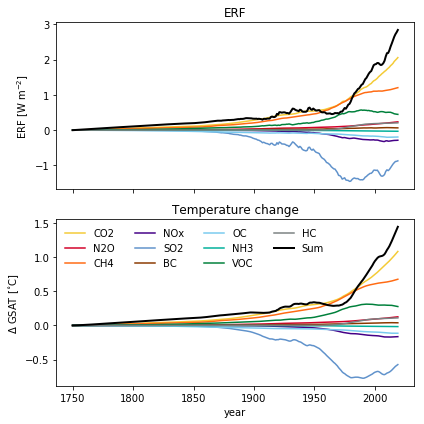

In [13]:
fig, axs = plt.subplots(2, sharex=True, figsize=[6,6])

ax_erf = axs[0]
ax_dT = axs[1]
for v in ds['variable'].values:
    ds.sel(variable=v)['Delta T'].plot(ax=ax_dT, label=v, c=cols[v])
    ds.sel(variable=v)['ERF'].plot(ax=ax_erf, c=cols[v])
ds.sum('variable')['Delta T'].plot(ax=ax_dT, label='Sum', c='k',linewidth=2)
ds.sum('variable')['ERF'].plot(ax=ax_erf, c='k',linewidth=2)
    
ax_dT.set_title('Temperature change')
ax_erf.set_title('ERF')
ax_erf.set_ylabel('ERF [W m$^{-2}$]')
ax_dT.set_ylabel('$\Delta$ GSAT [$^{\circ}$C]')
ax_erf.set_xlabel('')
ax_dT.legend(ncol=4, loc='upper left', frameon=False)
plt.tight_layout()
fig.savefig('hist_timeseries_ERF_dT.png', dpi=300)

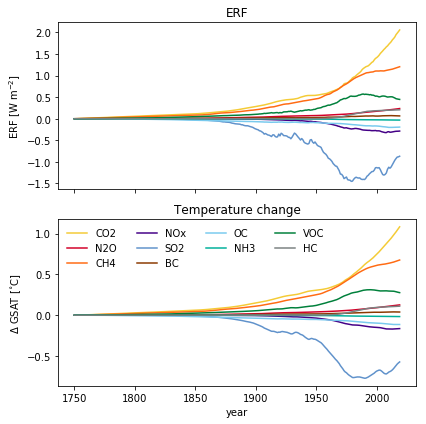

In [14]:
fig, axs = plt.subplots(2, sharex=True, figsize=[6,6])

ax_erf = axs[0]
ax_dT = axs[1]
for v in ds['variable'].values:
    ds.sel(variable=v)['Delta T'].plot(ax=ax_dT, label=v, c=cols[v])
    ds.sel(variable=v)['ERF'].plot(ax=ax_erf, c=cols[v])
ax_dT.set_title('Temperature change')
ax_erf.set_title('ERF')
ax_erf.set_ylabel('ERF [W m$^{-2}$]')
ax_dT.set_ylabel('$\Delta$ GSAT [$^{\circ}$C]')
ax_erf.set_xlabel('')
ax_dT.legend(ncol=4, loc='upper left', frameon=False)
plt.tight_layout()

Text(0,0.5,'$\\Delta$ T ($^\\circ$ C)')

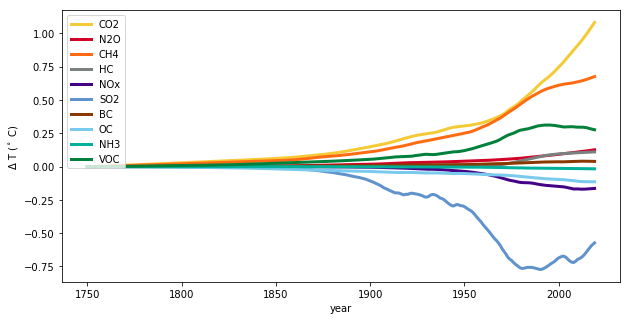

In [15]:
df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']
fig, ax = plt.subplots(figsize=[10,5])
for v in variables_all:
    df_deltaT[variables_all][v].plot(linewidth=3,ax = ax, label=v, color=cols[v])#, color=cols.items())
plt.legend(loc='upper left')
plt.ylabel('$\Delta$ T ($^\circ$ C)')

In [16]:
col_list = [cols[c] for c in df_deltaT.columns]
col_list

[(0.5411764705882353, 0.2235294117647059, 0.0),
 (1.0, 0.4196078431372549, 0.07450980392156863),
 (0.9568627450980393, 0.796078431372549, 0.21176470588235294),
 (0.47843137254901963, 0.5058823529411764, 0.5058823529411764),
 (0.8274509803921568, 0.0, 0.1568627450980392),
 (0.0, 0.6901960784313725, 0.6039215686274509),
 (0.26666666666666666, 0.0, 0.5254901960784314),
 (0.4745098039215686, 0.792156862745098, 0.9333333333333333),
 (0.3764705882352941, 0.5725490196078431, 0.796078431372549),
 (0.0, 0.5019607843137255, 0.23137254901960785)]

In [17]:
import seaborn as sns

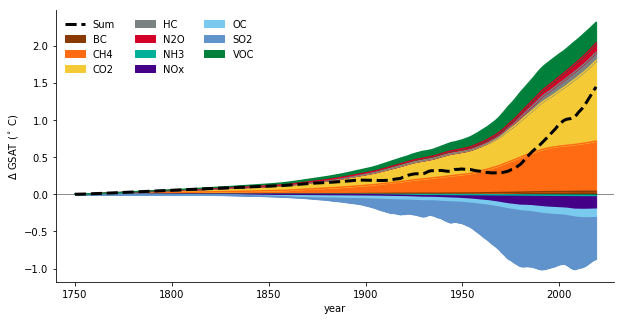

In [18]:
df_deltaT = ds['Delta T'].squeeze().drop('percentile').to_dataframe().unstack('variable')['Delta T']

fig, ax = plt.subplots(figsize=[10,5])
ax.hlines(0,1740,2028, linestyle='solid',alpha=0.9, color='k', linewidth=0.5)#.sum(axis=1).plot(linestyle='dashed', color='k', linewidth=3)

df_deltaT.plot.area( color=col_list, ax=ax)
df_deltaT.sum(axis=1).plot(linestyle='dashed', color='k', linewidth=3, label='Sum')
plt.legend(loc='upper left',ncol=3, frameon=False)
plt.ylabel('$\Delta$ GSAT ($^\circ$ C)')
ax.set_xlim([1740,2028])
sns.despine()

In [19]:
import seaborn as sns

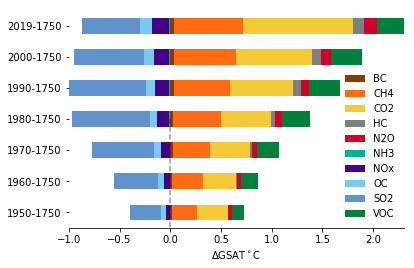

In [20]:
fig, ax = plt.subplots()
ax.vlines(0,-1,3, linestyle='dashed',alpha=0.4)
yrs = [1950,1960,1970,1980,1990,2000, 2019,]
labs ={y:f'{y}-1750' for y in yrs}
df_deltaT.loc[yrs].rename(labs,axis=0).plot.barh(stacked=True, color=col_list, ax=ax)
plt.legend(frameon=False)
sns.despine(fig, left=True)
ax.set_xlim([-1,2.3])
ax.set_xlabel('$\Delta$GSAT$^\circ$C')
ax.set_ylabel('')
plt.show()

# Split up into components

We use the original split up in ERF from Thornhill/Bill Collin's plot 

In [21]:
from ar6_ch6_rcmipfigs.constants import BASE_DIR, OUTPUT_DATA_DIR
# file path table of ERF 2019-1750

fp_collins =RESULTS_DIR/'tables_historic_attribution/table_mean_smb_orignames.csv'
fp_collins_sd = RESULTS_DIR/'tables_historic_attribution/table_std_smb_orignames.csv'

In [22]:
fn_est_ERF = OUTPUT_DATA_DIR/'historic_delta_GSAT/hist_ERF_est.csv'

In [23]:
import pandas as pd

In [24]:
fn_erf_decomposition = OUTPUT_DATA_DIR / 'historic_delta_GSAT/hist_ERF_est_decomp.csv'
fn_ERF_2019= OUTPUT_DATA_DIR/'historic_delta_GSAT/2019_ERF_est.csv'

In [38]:
df_collins = pd.read_csv(fn_ERF_2019, index_col=0)
df_collins.index = df_collins.index.rename('emission_experiment')
df_collins_sd = pd.read_csv(fp_collins_sd, index_col=0)
df_collins

,CO2,CH4_lifetime,Strat_H2O,Aerosol,Cloud,O3,HC,N2O,HFCs
emission_experiment,,,,,,,,,
CO2,2.057554,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000
CH4,0.017549,0.844457,0.05,-0.003448,0.017625,0.279179,0.00,0.00,0.000000
N2O,0.000000,-0.035967,0.00,-0.002717,0.040667,0.024311,0.00,0.21,0.000000
HC,0.000053,-0.050927,0.00,-0.010501,-0.016667,-0.164586,0.41,0.00,0.039772
NOx,0.000000,-0.380025,0.00,-0.011912,-0.013833,0.120237,0.00,0.00,0.000000
VOC,0.069491,0.162462,0.00,-0.003344,0.008500,0.210860,0.00,0.00,0.000000
SO2,0.000000,0.000000,0.00,-0.214702,-0.654434,0.000000,0.00,0.00,0.000000
OC,0.000000,0.000000,0.00,-0.066129,-0.127318,0.000000,0.00,0.00,0.000000
BC,0.000000,0.000000,0.00,0.123707,-0.058248,0.000000,0.00,0.00,0.000000


## don't add HFCs together with HC

In [37]:
#hfcs = df_collins['HFCs']
#df_collins = df_collins.drop('HFCs', axis=1)
#df_collins['HC'] = df_collins['HC'] + hfcs
#df_collins

In [41]:
varn = ['co2','N2O','HC','HFCs','ch4','o3','H2O_strat','ari','aci']
var_dir = ['CO2','N2O','HC','HFCs','CH4_lifetime','O3','Strat_H2O','Aerosol','Cloud']

In [42]:
rename_dic_cat = {
    'CO2':'Carbon dioxide (CO$_2$)',
    'GHG':'WMGHG',
    'CH4_lifetime': 'Methane (CH$_4$)',
    'O3': 'Ozone (O$_3$)',
    'Strat_H2O':'H$_2$O (strat)',
    'Aerosol':'Aerosol-radiation',
    'Cloud':'Aerosol-cloud',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC',
    'HFCs':'HFC'

}
rename_dic_cols ={
    'CO2':'CO$_2$',
    'CH4':'CH$_4$',
    'N2O':'N$_2$O',
    'HC':'CFC + HCFC + HFC',
    'NOx':'NO$_x$',
    'VOC':'NMVOC + CO',
    'SO2':'SO$_2$',
    'OC':'Organic carbon',
    'BC':'Black carbon',
    'NH3':'Ammonia'
}
tab_plt_ERF = df_collins.loc[::-1,var_dir].rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)#.transpose()
tab_plt = tab_plt_ERF
tab_plt_ERF

,Carbon dioxide (CO$_2$),N$_2$O,CFC + HCFC,HFC,Methane (CH$_4$),Ozone (O$_3$),H$_2$O (strat),Aerosol-radiation,Aerosol-cloud
emission_experiment,,,,,,,,,
Ammonia,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,-0.030954,0.000000
Black carbon,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.123707,-0.058248
Organic carbon,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,-0.066129,-0.127318
SO$_2$,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,-0.214702,-0.654434
NMVOC + CO,0.069491,0.00,0.00,0.000000,0.162462,0.210860,0.00,-0.003344,0.008500
NO$_x$,0.000000,0.00,0.00,0.000000,-0.380025,0.120237,0.00,-0.011912,-0.013833
CFC + HCFC + HFC,0.000053,0.00,0.41,0.039772,-0.050927,-0.164586,0.00,-0.010501,-0.016667
N$_2$O,0.000000,0.21,0.00,0.000000,-0.035967,0.024311,0.00,-0.002717,0.040667
CH$_4$,0.017549,0.00,0.00,0.000000,0.844457,0.279179,0.05,-0.003448,0.017625


In [43]:
import pandas as pd
num_mod_lab = 'Number of models (Thornhill 2020)'
thornhill = pd.read_csv(INPUT_DATA_DIR/'table2_thornhill2020.csv', index_col=0)
thornhill.index = thornhill.index.rename('Species')
thornhill

std_2_95th = 1.645

sd_tot = df_collins_sd['Total_sd']
df_err= pd.DataFrame(sd_tot.rename('std'))
df_err['SE'] = df_err

df_err['SE'] = df_err['std']/np.sqrt(thornhill[num_mod_lab])
df_err['95-50_SE'] = df_err['SE']*std_2_95th
df_err.loc['CO2','95-50_SE']= df_err.loc['CO2','std']
df_err

df_err['95-50'] = df_err['std']*std_2_95th
df_err.loc['CO2','95-50']= df_err.loc['CO2','std']
df_err

,std,SE,95-50_SE,95-50
Species,,,,
CO2,0.246907,NaN,0.246907,0.246907
CH4,0.182717,0.064600,0.106267,0.300569
N2O,0.061899,0.027682,0.045537,0.101825
HC,0.117053,0.047787,0.078609,0.192552
NOx,0.173085,0.077406,0.127333,0.284725
VOC,0.137949,0.061693,0.101484,0.226926
SO2,0.401442,0.163888,0.269596,0.660372
OC,0.134342,0.054845,0.090220,0.220992
BC,0.213043,0.080523,0.132460,0.350455


In [44]:
df_err = df_err.rename(rename_dic_cols, axis=0)

In [45]:
width = 0.7
kwargs = {'linewidth':.1,'edgecolor':'k'}

In [46]:
ybar = np.arange(len(tab_plt)+1)#, -1)
ybar

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

## Scale delta GSAT by ERF 

### Source of delta T equal to source of ERF

In [47]:
df_collins

,CO2,CH4_lifetime,Strat_H2O,Aerosol,Cloud,O3,HC,N2O,HFCs
emission_experiment,,,,,,,,,
CO2,2.057554,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000
CH4,0.017549,0.844457,0.05,-0.003448,0.017625,0.279179,0.00,0.00,0.000000
N2O,0.000000,-0.035967,0.00,-0.002717,0.040667,0.024311,0.00,0.21,0.000000
HC,0.000053,-0.050927,0.00,-0.010501,-0.016667,-0.164586,0.41,0.00,0.039772
NOx,0.000000,-0.380025,0.00,-0.011912,-0.013833,0.120237,0.00,0.00,0.000000
VOC,0.069491,0.162462,0.00,-0.003344,0.008500,0.210860,0.00,0.00,0.000000
SO2,0.000000,0.000000,0.00,-0.214702,-0.654434,0.000000,0.00,0.00,0.000000
OC,0.000000,0.000000,0.00,-0.066129,-0.127318,0.000000,0.00,0.00,0.000000
BC,0.000000,0.000000,0.00,0.123707,-0.058248,0.000000,0.00,0.00,0.000000


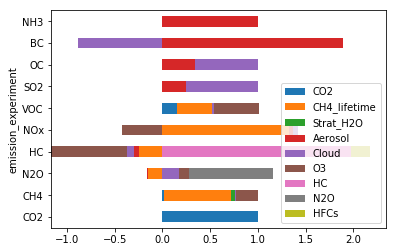

In [48]:
dT_2019 = pd.DataFrame(df_deltaT.loc[2019])
dT_2019.index= dT_2019.index.rename('emission_experiment')
df_coll_t = df_collins.transpose()
if 'Total' in df_coll_t.index:
    df_coll_t = df_coll_t.drop('Total')
# scale by total:
scale = df_coll_t.sum()
# normalized ERF: 
df_col_normalized = df_coll_t/scale
#
df_col_normalized.transpose().plot.barh(stacked=True)

We multiply the change in GSAT in 2019 by the matrix describing the source distribution from the ERF:

In [49]:
df_dt_sep = dT_2019[2019]*df_col_normalized
df_dt_sep=df_dt_sep.transpose()

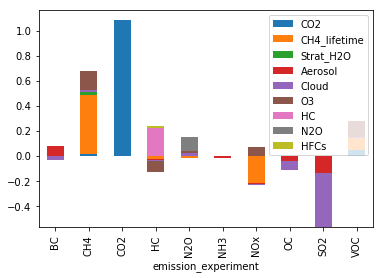

In [50]:
df_dt_sep.plot.bar(stacked=True)

#### Double check that the sum is the same as before:

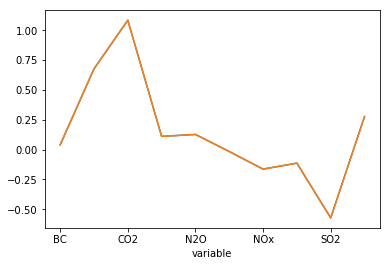

In [51]:
df_dt_sep.transpose().sum().plot.line()

df_deltaT.loc[2019].plot.line()#bar(stacked=True)

In [52]:
ybar = np.arange(len(tab_plt)+1)#, -1)
ybar

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Correct order of variables:

In [53]:
exps_ls = ['CO2', 'CH4', 'N2O', 'HC', 'NOx', 'VOC', 'SO2', 'OC', 'BC', 'NH3']

In [54]:
tab_plt_dT = df_dt_sep.loc[::-1,var_dir]#.rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)
tab_plt_dT=tab_plt_dT.loc[exps_ls]
tab_plt_dT =tab_plt_dT.rename(rename_dic_cat, axis=1).rename(rename_dic_cols, axis=0)

In [55]:
cmap = get_cmap_dic(var_dir)
col_ls = [cmap[c] for c in cmap.keys()]

(0.9568627450980393, 0.796078431372549, 0.21176470588235294)
(0.8274509803921568, 0.0, 0.1568627450980392)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.21568627450980393, 0.49411764705882355, 0.7215686274509804)
(1.0, 0.4196078431372549, 0.07450980392156863)
(0.5254901960784314, 0.7803921568627451, 0.29411764705882354)
(0.47843137254901963, 0.5058823529411764, 0.5058823529411764)
(0.792156862745098, 0.6980392156862745, 0.8392156862745098)
(0.5607843137254902, 0.0, 0.6470588235294118)


In [56]:
tab_plt_dT

,Carbon dioxide (CO$_2$),N$_2$O,CFC + HCFC,HFC,Methane (CH$_4$),Ozone (O$_3$),H$_2$O (strat),Aerosol-radiation,Aerosol-cloud
emission_experiment,,,,,,,,,
CO$_2$,1.083193,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
CH$_4$,0.009846,0.000000,0.000000,0.00000,0.473787,0.156635,0.028053,-0.001935,0.009889
N$_2$O,0.000000,0.112223,0.000000,0.00000,-0.019221,0.012991,0.000000,-0.001452,0.021732
CFC + HCFC + HFC,0.000028,0.000000,0.218342,0.02118,-0.027121,-0.087649,0.000000,-0.005592,-0.008876
NO$_x$,0.000000,0.000000,0.000000,0.00000,-0.218494,0.069130,0.000000,-0.006849,-0.007953
NMVOC + CO,0.042901,0.000000,0.000000,0.00000,0.100298,0.130177,0.000000,-0.002064,0.005248
SO$_2$,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.141534,-0.431411
Organic carbon,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-0.038984,-0.075055
Black carbon,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.073458,-0.034588


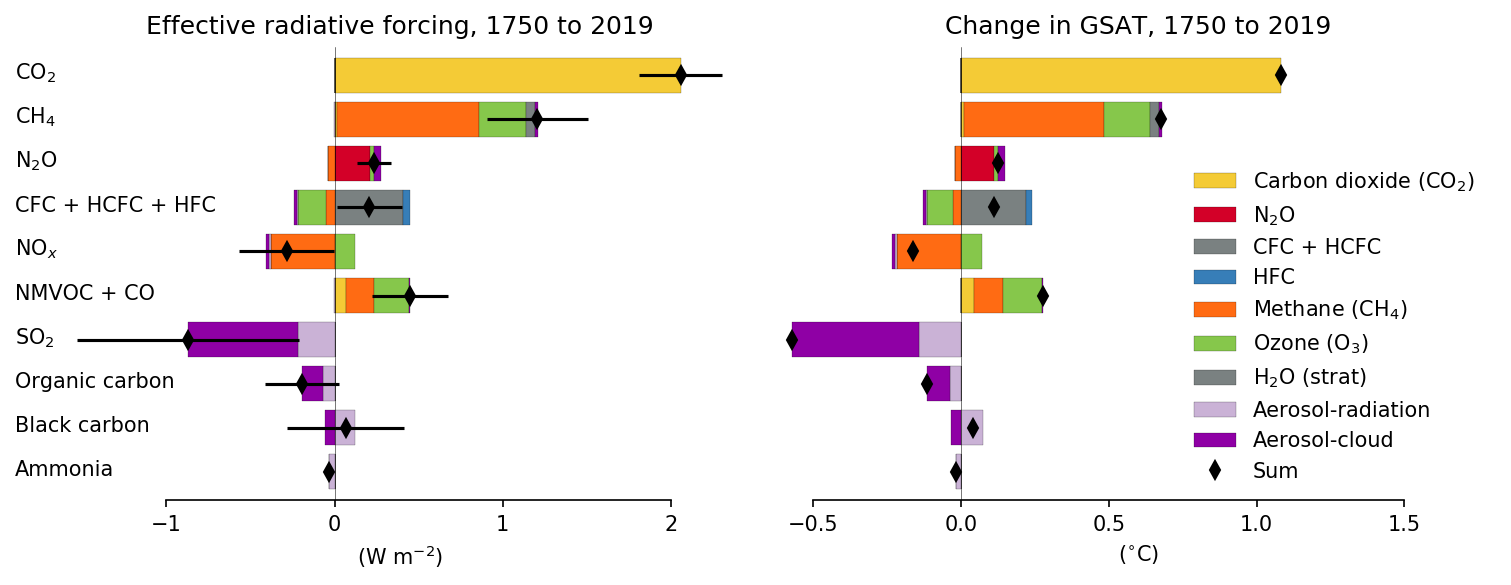

In [59]:
fig, axs = plt.subplots(1,2,dpi=150, figsize=[10,4])
width=.8
kws = {
    'width':.8,
    'linewidth':.1,
    'edgecolor':'k',
    
}

ax=axs[0]
tab_plt_ERF.plot.barh(stacked=True, color=col_ls, ax=ax,**kws)
#tot = table['Total'][::-1]
tot = tab_plt_ERF.sum(axis=1)#tab_plt
xerr = df_err['95-50'][::-1]
y = np.arange(len(tot))
ax.errorbar(tot, y,xerr=xerr,marker='d', linestyle='None', color='k', label='Sum', )
#ax.legend(frameon=False)
ax.set_ylabel('')


for lab, y in zip(tab_plt.index, ybar):
        #plt.text(-1.55, ybar[i], species[i],  ha='left')#, va='left')
    ax.text(-1.9, y-0.1, lab,  ha='left')#, va='left')
ax.set_title('Effective radiative forcing, 1750 to 2019')
ax.set_xlabel(r'(W m$^{-2}$)')
#ax.set_xlim(-1.5, 2.6)
    #plt.xlim(-1.6, 2.0)
#sns.despine(fig, left=True, trim=True)
ax.legend(loc='lower right', frameon=False)
ax.axvline(x=0., color='k', linewidth=0.25)
ax.set_yticks([])

ax.get_legend().remove()





ax=axs[1]
tab_plt_dT[::-1].plot.barh(stacked=True, color=col_ls, ax=ax,**kws)
tot = tab_plt_dT.sum(axis=1)[::-1]
#xerr =0# df_err['95-50'][::-1]
y = np.arange(len(tot))
ax.errorbar(tot, y,marker='d', linestyle='None', color='k', label='Sum', )
#ax.legend(frameon=False)
ax.set_ylabel('')

ax.set_title('Change in GSAT, 1750 to 2019')
ax.set_xlabel(r'($^{\circ}$C)')
ax.set_xlim(-.6, 1.8)


sns.despine(fig, left=True, trim=True)
ax.spines['bottom'].set_bounds(-.5,1.5)

ax.legend(loc='lower right', frameon=False)
ax.axvline(x=0., color='k', linewidth=0.25)
fn = 'ERF_DELTA_GSAT_1750_2019.png'
fp = RESULTS_DIR /'figures_historic_attribution_DT'/fn
fp.parent.mkdir(parents=True, exist_ok=True)
ax.set_yticks([])
fig.tight_layout()
plt.savefig(fp, dpi=300, bbox_inches='tight')
plt.savefig(fp.with_suffix('.pdf'), dpi=300, bbox_inches='tight')
plt.show()

## Meeting notes:


- Replace WMGHG by N2O /halogenated (posibilitity to split in blue/darkblue??)
- VOC should be NMVOC
- Title “Emission based ERF in 2019 relative to 1750”
- Add HFCs
Idealized delta GSAT:
- Mock up for zoom out from the bigger one
- Add the emissions protocol in a corner,
- Title is it “mitigation” and not idealized sustained reductions?



## GSAT timeseries
- _Giddens and aerc_
- _impact --> effect_

- _Replace low NTCF by low SLCF low CH4 or low SLCF high CH4_
- _Giddens: low CH4_
- _aerchemip: high CH4_
- Impact SHOULD BE effect!!
- Add above the uncertainty bar what it represent (on the figure)
- Add °C for the top 2 left panels

- Add a second y-axis for absolute change comp w 1850


- _relative to 2019 

- Add relative to 1750
- 

## SSP bar plot:


- _Replace low NTCF by low SLCF low CH4 or low SLCF high CH4_
- _Replace delta by GSAT change_
- _relative to 2019_